Supervised learning:

En este caso tenemos cierto dataset con características distintas, y conocemos cierto resultado extraíble de estos. En este caso, buscamos relacionar los features con el resultado conocido, para establecer patrones entre estos y predecir cuándo se dará el resultado que conocemos a partir de ciertos features y poder clasificar.

El algoritmo entonces va aprendiendo por su cuenta las relaciones existentes entre el resultado conocido y las características que entregamos.

Vamos a querer predecir entonces este resultado con la mayor precisión posible, por ejemplo:

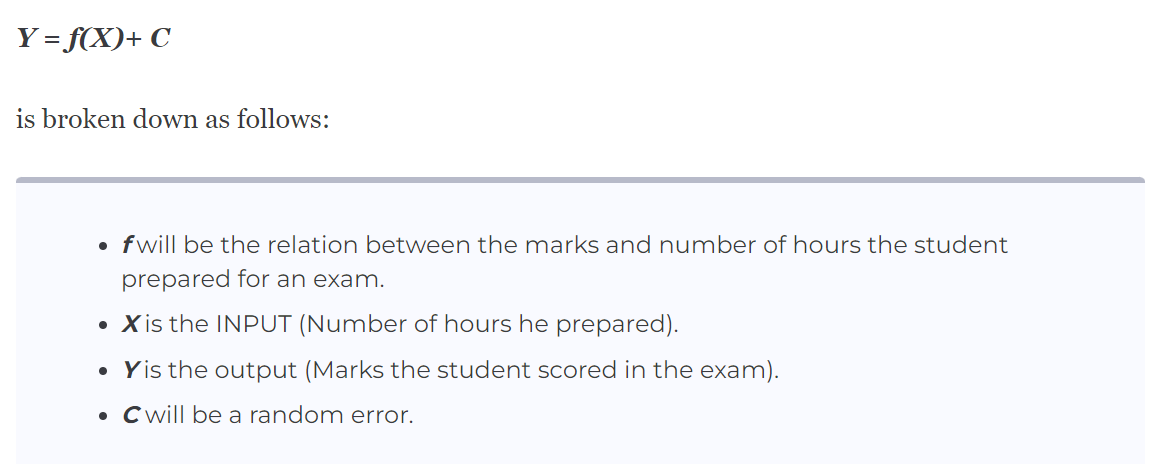


Vamos a querer predecir Y con la mayor precisión posible. Tener tanto X como Y, lo llamaremos tener features (X) y target variables (Y).

Numpy:

- array: Es como una lista, pero se guarda como una clase de numpy, lo que permite usar propiedades de clases y de listas en nuestro array:

In [6]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt

#  Create an array wit Numpy
# We can create an array from a list
myarray = np.array([1,2,3,4])
print("My array is  = {}, type : {}".format(myarray,type(myarray)))

My array is  = [1 2 3 4], type : <class 'numpy.ndarray'>


In [3]:
#array operation and an example of a method
myarray.sum()

10

Esto nos permite crear arrays multidimensionales que nos permitirán almacenar datos de forma útil, podremos hacer por ejemplo:

In [7]:
# Definimos un array multidimensional mymat.
mymat = np.ones((4,4)) # 4 rows e 4 columns
print("mymat :\n", mymat)
print("mymat shape : ",(mymat.shape))

mymat :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
mymat shape :  (4, 4)


In [5]:
# sum a number to each element of the array
sumWithScalar = myarray + 1
print(sumWithScalar)

[2 3 4 5]


In [8]:
# modificamos nuestro array
myarray[-1]=0#  -1 means the last element
print("my modified array = {}, type : {}".format(myarray,type(myarray)))

my modified array = [1 2 3 0], type : <class 'numpy.ndarray'>


Podemos también rehacer el tamaño de nuestro array, lo que conserva la información, pero la reordena de un modo útil: 

In [17]:
#trasposition
myarray.reshape(1,-1)

array([[1, 2, 3, 0]])

In [11]:
myarray.reshape(2,-2)

array([[1, 2],
       [3, 0]])

Otras transformaciones útiles:

In [9]:
# scalar multiplication
prodWithScalar = myarray * 2
print(prodWithScalar)


#matrix product, se usa @ para multiplicar
print(mymat@myarray)

print("along rows")
print(mymat*myarray)
print("along columns")
print(mymat*myarray.reshape(-1,1))

[2 4 6 0]
[6. 6. 6. 6.]
along rows
[[1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]
 [1. 2. 3. 0.]]
along columns
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]]


In [10]:
#concatenation -> agregamos una nueva fila compuesta por myarray a mymat
np.concatenate([mymat,np.expand_dims(myarray,0)],axis=0)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 2., 3., 0.]])

In [11]:
#creamos una nueva columna compuesta por myarray en mymat
np.concatenate([mymat,np.expand_dims(myarray,1)],axis=1)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 3.],
       [1., 1., 1., 1., 0.]])

random array:

Para crear un array de números randoms podemos usar:

In [12]:
Npoints= 1000 #cantidad de puntos que queremos generar
D = 2  # máximo dimensional de los puntos que queremos
n = 2  # número que nos dará qué tan grande es la desviación estándar o qué tan chica, depende de lo que queramos

mu1 = np.array([3,2])
mu2  =np.array([1,-1])
cov1 = np.array([[3, 1], [1, 2]])

d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1 # multiplicamos por una matriz de 2x2
d2 = n*np.random.randn(Npoints, D) + mu2  # esta es la desviación estándar, será útil para graficar

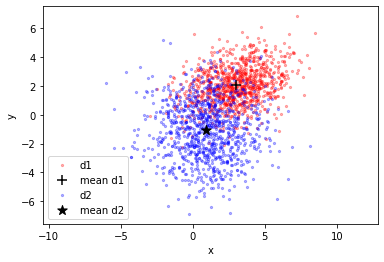

In [23]:
# Para graficar esto, podemos usar:

f,ax = plt.subplots(1)
ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="mean d1") # usamos la media
ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="mean d2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()

Luego con estos datos crearemos nuestro modelo:

In [13]:
# concatenate data from the two distribution in a single array
data= np.concatenate([d1,d2],axis=0)
labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
print("data shape : ", data.shape)
print("label shape : ", labels.shape)
# now data/labels pair is our dummy dataset that will be used to tarin/test the model

np.savez("nydata.npz",data=data,labels=labels)# an example on how to save in numpy



from sklearn.model_selection import train_test_split  # crea la cantidad de datos útiles para: entrenar y testear



# train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42) # elegimos los tamaños
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)

print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

data shape :  (2000, 2)
label shape :  (2000,)
X_train shape :  (1340, 2)
y_train shape :  (1340,)
X_test shape :  (660, 2)
y_test shape :  (660,)


In [14]:
from sklearn.linear_model import LogisticRegression  #haremos una regresión logística

clf = LogisticRegression() # inicializamos esta regresión


clf.fit(X_train, y_train) # train the model, fiteamos la data, le entregamos los datos y los target values y.


clf.score(X_test, y_test)

0.8484848484848485

The fit method generally accepts 2 inputs:

- The samples matrix (or design matrix) X. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.

- The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values).

In [30]:

print("coeff of the linear regression", clf.coef_)

coeff of the linear regression [[-0.44514942 -1.1243392 ]]


In [15]:
# generate a line, defined as slope and intercept from the learned parameter
# p=0.5 when y = 0 (there is a sigmoid), p la probabilidad e y la imagen de la curva
# y = 0 = a1x1+ a2x2 + b
# find for x2 = m x1 + c, donde x2 es otro ajuste de la curva
a1,a2 = clf.coef_[0]  # a1 y a2 son los coeficientes de la función lineal
b = clf.intercept_  # donde intercepta al eje y la línea
m=-a1/a2  # pendiente de la línea
c=-b/a2  # intercepción con y de x2, nos entrega el valor de a2 conociendo b
t=np.linspace(-4,6,100)  # una línea para ver si es lineal la distribución

In [17]:
pred_class = clf.predict(X_test)

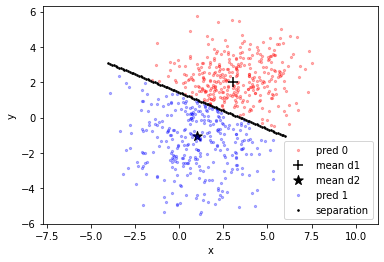

In [18]:
f,ax = plt.subplots(1)
ax.scatter(X_test[pred_class==0,0],X_test[pred_class==0,1],s=5,alpha=0.3,color="r",label="pred 0")
ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="mean d1")
ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="mean d2")
ax.scatter(X_test[pred_class==1,0],X_test[pred_class==1,1],s=5,alpha=0.3,color="b",label="pred 1")
# plot the decision curve
ax.scatter(t,m*t+c,s=10,alpha=1,marker=".",color="k",label="separation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')
plt.legend()


Parte 2:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# this function has default values!!!!!

Npoints= 1000
def get_dataset_ball(Npoints ,mu1=np.array([1,1]),  mu2  =np.array([-1,-1]),sigma=0.1):


    D = 2
    cov1 = sigma*np.array([[3, 1], [1, 2]])

    d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1
    d2 = sigma*np.random.randn(Npoints, D) + mu2

    # concatenate classes
    data= np.concatenate([d1,d2],axis=0)
    labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
    print(data.shape)
    print(labels.shape)
    return data, labels

X1, y1 = get_dataset_ball(Npoints)

(2000, 2)
(2000,)


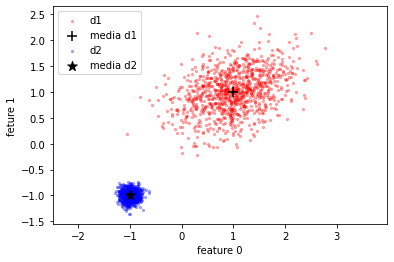

In [21]:

def plot_dataset(X,y):

  f,ax = plt.subplots(1)
  d1 = X[y==0,:]
  d2 = X[y==1,:]
  ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
  ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
  ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
  ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feture 1")
  ax.axis('equal')
  plt.legend()

plot_dataset(X1,y1)

Vemos que estos sets de datos podemos separarlos fácilmente con una línea, sin embargo en otros casos:

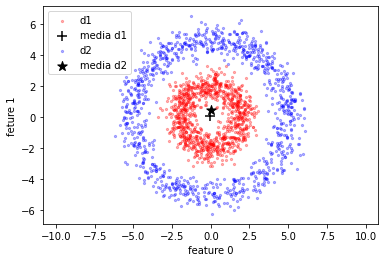

In [23]:
def get_dataset_circle(Npoints, sigma=0.5):
    # Radius of the inner circle (class 0)
    radius_inner_circle = 2

    # Radius of the outer circle (class 1)
    radius_outer_circle = 5

    # Generate random angles for the circles
    theta_inner_circle = 2 * np.pi * np.random.rand(Npoints)
    theta_outer_circle = 2 * np.pi * np.random.rand(Npoints)

    # Generate points for class 0 (inner circle)
    x_inner_circle = radius_inner_circle * np.cos(theta_inner_circle)
    y_inner_circle = radius_inner_circle * np.sin(theta_inner_circle)

    # Generate points for class 1 (outer circle)
    x_outer_circle = radius_outer_circle * np.cos(theta_outer_circle)
    y_outer_circle = radius_outer_circle * np.sin(theta_outer_circle)

    # Create labels for the classes
    labels_inner_circle = np.zeros(Npoints)
    labels_outer_circle = np.ones(Npoints)

    # Concatenate the points and labels for the two classes
    X = np.concatenate((np.vstack((x_inner_circle, y_inner_circle)).T, np.vstack((x_outer_circle, y_outer_circle)).T))

    X = X + sigma*np.random.randn(*X.shape)# this is a tu
    y = np.concatenate((labels_inner_circle, labels_outer_circle))
    return X, y

X2,y2 = get_dataset_circle(Npoints, sigma=0.5)

plot_dataset(X2,y2)

Vemos que en este caso, no es fácil trazar una línea que separe nuestros datos. Para esto, podemos separar la data: 

In [24]:
# Splitting data: separamos entre los datos para testear y entrenar para 2 grupos:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)


from sklearn.model_selection import KFold# look for it on the documentation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# this is the cross validation

kf = KFold(n_splits=4)
for i,(train, validation) in enumerate(kf.split(X1_train)): # train, test are the indices for each fold
    print(" test size for fold {}  : {}".format(i,len(validation)))
    print("validation:")
    print(validation)

 test size for fold 0  : 335
validation:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 2

Estamos dividiendo la data en 5 partes, es un k-fold validation, en los cuales separamos nuestra data para ver cuál de todos estos es mejor para generar el algoritmo. Para analizar la precisión de cada uno:

In [31]:
# creamos una función que nos dirá qué tan preciso es cada grupo que hicimos
def compare_accuracy(X1_train,y1_train):
  accuracyLR = []# create an array to store solutions
  accuracyKNN = []
  marray= []
  barray=[]
  for i,(train, validation) in enumerate(kf.split(X1_train)): # dividimos la data con esta función
    Xt = X1_train[train]
    Xv = X1_train[validation]
    yt = y1_train[train]
    yv = y1_train[validation]

    LR = LogisticRegression(random_state=0).fit(Xt, yt) # nuevamente hacemos una línea
    KNN = KNeighborsClassifier(n_neighbors=5).fit(Xt, yt)
    a1,a2 = LR.coef_[0]# parameters of the model
    b = LR.intercept_
    m=-a1/a2
    c=-b/a2

    predLR = LR.score(Xv,yv)
    predKNN = KNN.score(Xv,yv)

    accuracyLR.append(predLR) # valores de precisión de cada grupo
    accuracyKNN.append(predKNN)

    marray.append(m)
    barray.append(c)

  print("LR : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyLR),np.std(accuracyLR)))
  print("KNN : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyKNN),np.std(accuracyKNN)))

  return accuracyLR, accuracyKNN, marray, barray

Si quieremos hacer esto para el segundo caso, donde teníamos círculos concéntricos, lo que podemos hacer es pasar la distribución de cartesianas a polares y usar solo una región:

In [40]:
accuracyLR, accuracyKNN , marray, barray  = compare_accuracy(X2_train,y2_train) # revisamos qué tan bueno es este grupo
barray

LR : mean accuracy is 0.548 +/- 0.019
KNN : mean accuracy is 0.999 +/- 0.001


[array([-0.25438916]),
 array([0.25930385]),
 array([0.54236793]),
 array([1.25816237])]

In [34]:
def plot_dataset(X,y,PLTDL = False,marray=[],barray=[]): # definimos esta función que grafica los puntos

  f,ax = plt.subplots(1)
  d1 = X[y==0,:]
  d2 = X[y==1,:]
  ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
  ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
  ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
  ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feture 1")
  ax.axis('equal')
  plt.legend()
  if PLTDL:

    # plot the decision curve
    for m,c in zip(marray,barray):
      t=np.linspace(-4,6,100)
      ax.scatter(t,m*t+c,s=10,alpha=1,marker=".",color="k",label="separation")

LR : mean accuracy is 0.999 +/- 0.003
KNN : mean accuracy is 0.999 +/- 0.001


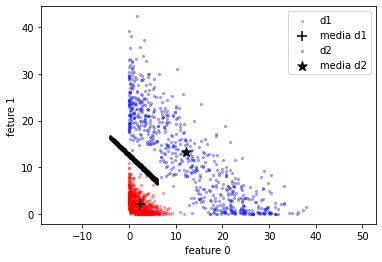

In [35]:

accuracyLR, accuracyKNN,marray,barray  = compare_accuracy(X2_train**2,y2_train)
plot_dataset(X2_train**2,y2_train,PLTDL = True, marray=marray,barray=barray)#

[[-0.95234694  2.67470625]
 [ 2.12833478  0.21345665]
 [-3.28716039  3.07948158]
 ...
 [-2.06025927  0.19452064]
 [ 1.03547095 -4.5625446 ]
 [-0.57665482 -4.57816459]]


[ 8.06101825  4.57537268 20.28863022 ...  4.28250653 21.88901329
 21.2921218 ]


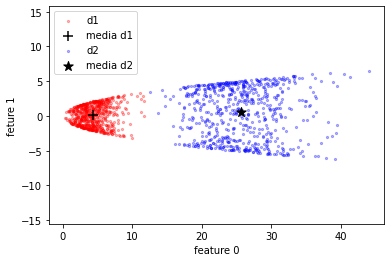

In [57]:
print(X2_train)
R = X2_train[:,0]**2 + X2_train[:,1]**2 # ponderamos por el radio, pues el rojo esmás corto que el azul
print("\n")
print(R)
tmpdataset = X2_train.copy()
tmpdataset[:,0] = R  # la columna 0 será R
tmpdataset[:,1] = X2_train[:,1] # la columna 1 será la columna 1 de X2_train
plot_dataset(tmpdataset,y2_train)